In [1]:
import time
import random
import numpy as np

In [2]:
from qiskit import QuantumProgram, QuantumCircuit
import Qconfig

In [3]:
qprogram = QuantumProgram()
qprogram.set_api(Qconfig.APItoken, Qconfig.config["url"])

In [4]:
qprogram.available_backends()

['ibmqx4',
 'ibmqx2',
 'ibmqx5',
 'ibmqx_qasm_simulator',
 'local_qasm_simulator',
 'local_unitary_simulator']

In [5]:
qprogram.get_backend_status("ibmqx4")

{'available': True, 'busy': False, 'pending_jobs': 0}

In [6]:
config = qprogram.get_backend_configuration("ibmqx4",list_format=True)
config

{'basis_gates': 'SU2+CNOT',
 'chip_name': 'Raven',
 'coupling_map': [[1, 0], [2, 0], [2, 1], [2, 4], [3, 2], [3, 4]],
 'description': '5 qubit transmon bowtie chip 3',
 'n_qubits': 5,
 'name': 'ibmqx4',
 'online_date': '2017-09-18T11:00:00.000Z',
 'simulator': False,
 'url': 'https://ibm.biz/qiskit-ibmqx4',
 'version': '1'}

In [7]:
calib = qprogram.get_backend_calibration("ibmqx4")
print('Gate error :\n------------')
print([item['gateError']['value'] for item in calib['qubits']])
print('\nReadout error :\n---------------')
print([item['readoutError']['value'] for item in calib['qubits']])
print('Multi qubit gate error :\n------------')
print([item['gateError']['value'] for item in calib['multi_qubit_gates']])
calib

Gate error :
------------
[0.001545458810288558, 0.0007726307293453583, 0.0012019552727863259, 0.0013737021608475342, 0.002060787371647721]

Readout error :
---------------
[0.035, 0.042, 0.024, 0.055, 0.047]
Multi qubit gate error :
------------
[0.020541297001783476, 0.02887982526689828, 0.025959274240280383, 0.027792418874496655, 0.018784785057407022, 0.030784762253458553]


{'backend': 'ibmqx4',
 'last_update_date': '2017-09-28T10:58:00.000Z',
 'multi_qubit_gates': [{'gateError': {'date': '2017-09-28T10:58:00Z',
    'value': 0.020541297001783476},
   'name': 'CX1_0',
   'qubits': [1, 0],
   'type': 'CX'},
  {'gateError': {'date': '2017-09-28T10:58:00Z', 'value': 0.02887982526689828},
   'name': 'CX2_0',
   'qubits': [2, 0],
   'type': 'CX'},
  {'gateError': {'date': '2017-09-28T10:58:00Z',
    'value': 0.025959274240280383},
   'name': 'CX2_1',
   'qubits': [2, 1],
   'type': 'CX'},
  {'gateError': {'date': '2017-09-28T10:58:00Z',
    'value': 0.027792418874496655},
   'name': 'CX2_4',
   'qubits': [2, 4],
   'type': 'CX'},
  {'gateError': {'date': '2017-09-28T10:58:00Z',
    'value': 0.018784785057407022},
   'name': 'CX3_2',
   'qubits': [3, 2],
   'type': 'CX'},
  {'gateError': {'date': '2017-09-28T10:58:00Z',
    'value': 0.030784762253458553},
   'name': 'CX3_4',
   'qubits': [3, 4],
   'type': 'CX'}],
 'qubits': [{'gateError': {'date': '2017-09-28T1

In [8]:
param = qprogram.get_backend_parameters("ibmqx4")
print('T1:\n---')
print([(item['T1']['value'],item['T1']['unit']) for item in param['qubits']])
print('\nT2:\n---')
print([(item['T2']['value'],item['T2']['unit']) for item in param['qubits']])
param

T1:
---
[(44.3, 'µs'), (65.9, 'µs'), (32.4, 'µs'), (43, 'µs'), (48.3, 'µs')]

T2:
---
[(42.3, 'µs'), (44.5, 'µs'), (36.1, 'µs'), (54.3, 'µs'), (19, 'µs')]


{'backend': 'ibmqx4',
 'fridge_parameters': {'Temperature': {'date': '2017-09-28T10:58:00Z',
   'unit': 'K',
   'value': 0.021},
  'cooldownDate': '2017-09-07'},
 'last_update_date': '2017-09-28T10:58:00.000Z',
 'qubits': [{'T1': {'date': '2017-09-28T10:58:00Z',
    'unit': 'µs',
    'value': 44.3},
   'T2': {'date': '2017-09-28T10:58:00Z', 'unit': 'µs', 'value': 42.3},
   'buffer': {'date': '2017-09-28T10:58:00Z', 'unit': 'ns', 'value': 10},
   'frequency': {'date': '2017-09-28T10:58:00Z',
    'unit': 'GHz',
    'value': 5.24609},
   'gateTime': {'date': '2017-09-28T10:58:00Z', 'unit': 'ns', 'value': 50},
   'name': 'Q0'},
  {'T1': {'date': '2017-09-28T10:58:00Z', 'unit': 'µs', 'value': 65.9},
   'T2': {'date': '2017-09-28T10:58:00Z', 'unit': 'µs', 'value': 44.5},
   'buffer': {'date': '2017-09-28T10:58:00Z', 'unit': 'ns', 'value': 10},
   'frequency': {'date': '2017-09-28T10:58:00Z',
    'unit': 'GHz',
    'value': 5.30262},
   'gateTime': {'date': '2017-09-28T10:58:00Z', 'unit': 'ns

In [9]:
# Find a reasonable formula to automatically choose the best two qubits.

In [10]:
possible_pairs = config['coupling_map']
print(possible_pairs)
cp = 3 #the chosen pair
print(possible_pairs[cp])

[[1, 0], [2, 0], [2, 1], [2, 4], [3, 2], [3, 4]]
[2, 4]


In [11]:
n = config['n_qubits']
q = qprogram.create_quantum_register("q",n)
c = qprogram.create_classical_register("c",n)

In [12]:
qc_FT = qprogram.create_circuit("prep_FT",[q],[c])
qc_FT.h(q[2])
qc_FT.cx(q[2],q[0])
qc_FT.cx(q[2],q[1])
qc_FT.h(q[2])
qc_FT.h(q[3])
qc_FT.cx(q[3],q[2])
qc_FT.h(q[2])
qc_FT.h(q[3])
qc_FT.cx(q[2],q[4])
qc_FT.cx(q[2],q[0])
qc_FT.measure(q[0],c[0])
qc_FT.measure(q[1],c[1])
qc_FT.measure(q[2],c[2])
qc_FT.measure(q[3],c[3])
qc_FT.measure(q[4],c[4])

In [13]:
def swap_circuit(qr,pair,qp):
    qcircuitswap = qp.create_circuit("SWAP"+str(pair),[qr],[])
    qcircuitswap.cx(qr[pair[0]],qr[pair[1]])
    qcircuitswap.h(qr[pair[0]])
    qcircuitswap.h(qr[pair[1]])
    qcircuitswap.cx(qr[pair[0]],qr[pair[1]])
    qcircuitswap.h(qr[pair[0]])
    qcircuitswap.h(qr[pair[1]])
    qcircuitswap.cx(qr[pair[0]],qr[pair[1]])
    return qcircuitswap

In [14]:
qc_NFT = qprogram.create_circuit("prep_NFT",[q],[c])
qc_NFT.h(q[3])
qc_NFT.cx(q[3],q[4])
qc_NFT.cx(q[3],q[2])
qc_NFT.cx(q[2],q[1])
qc_NFT.measure(q[0],c[0])
qc_NFT.measure(q[1],c[1])
qc_NFT.measure(q[2],c[2])
qc_NFT.measure(q[3],c[3])
qc_NFT.measure(q[4],c[4])

In [15]:
qc_NFTold = qprogram.create_circuit("prep_NFTold",[q],[c])
qc_NFTold.h(q[2])
qc_NFTold.h(q[3])
qc_NFTold.cx(q[3],q[4])
qc_NFTold.h(q[4])
qc_NFTold.cx(q[2],q[4])
qc_NFTold.h(q[4])
qc_NFTold.extend(swap_circuit(q,[2,1],qprogram))
qc_NFTold.cx(q[3],q[2])
qc_NFTold.cx(q[2],q[0])
qc_NFTold.h(q[0])
qc_NFTold.cx(q[1],q[0])
qc_NFTold.h(q[0])
qc_NFTold.h(q[1])
qc_NFTold.measure(q[0],c[0])
qc_NFTold.measure(q[1],c[1])
qc_NFTold.measure(q[2],c[2])
qc_NFTold.measure(q[3],c[3])
qc_NFTold.measure(q[4],c[4])

In [16]:
qc_FTv2 = qprogram.create_circuit("prep_FTv2",[q],[c])
qc_FTv2.h(q[3])
qc_FTv2.cx(q[3],q[2])
qc_FTv2.h(q[2])
qc_FTv2.h(q[3])
qc_FTv2.cx(q[2],q[1])
qc_FTv2.cx(q[3],q[4])
qc_FTv2.h(q[4])
qc_FTv2.extend(swap_circuit(q,[2,4],qprogram))
qc_FTv2.cx(q[2],q[0])
qc_FTv2.cx(q[1],q[0])
qc_FTv2.h(q[4])
qc_FTv2.measure(q[0],c[0])
qc_FTv2.measure(q[1],c[1])
qc_FTv2.measure(q[2],c[2])
qc_FTv2.measure(q[3],c[3])
qc_FTv2.measure(q[4],c[4])

In [17]:
def prep_bare_circuit(pair,qprogram, q, c):
    qc_ppBare = qprogram.create_circuit("prep_Bare - "+str(pair),[q],[c])
    qc_ppBare.measure(q[pair[0]],c[pair[0]])
    qc_ppBare.measure(q[pair[1]],c[pair[1]])
    return qc_ppBare
qc_ppBare = prep_bare_circuit(possible_pairs[cp],qprogram,q,c)

In [19]:
result = qprogram.execute(["prep_FT","prep_FTv2","prep_NFTold","prep_NFT","prep_Bare - "+str(possible_pairs[cp])], "ibmqx4", shots=8192, max_credits=5, wait=10, timeout=2400)

In [22]:
print(result.get_counts("prep_FT"))
print(result.get_counts("prep_FTv2"))
print(result.get_counts("prep_NFT"))
print(result.get_counts("prep_NFTold"))
print(result.get_counts("prep_Bare - "+str(possible_pairs[cp])))

{'10000': 77, '10001': 5, '10010': 16, '10011': 16, '10100': 125, '10101': 32, '10110': 599, '10111': 92, '11000': 23, '11001': 12, '11010': 60, '11011': 50, '11100': 362, '11101': 79, '11110': 1990, '11111': 210, '00000': 3440, '00001': 89, '00010': 69, '00011': 44, '00100': 57, '00101': 28, '00110': 74, '00111': 5, '01000': 175, '01001': 15, '01010': 49, '01011': 60, '01100': 93, '01101': 18, '01110': 200, '01111': 28}
{'10000': 954, '10001': 71, '10010': 34, '10011': 233, '10100': 93, '10101': 654, '10110': 57, '10111': 21, '11000': 167, '11001': 197, '11010': 154, '11011': 1446, '11100': 43, '11101': 56, '11110': 199, '11111': 73, '00000': 1373, '00001': 67, '00010': 25, '00011': 145, '00100': 129, '00101': 770, '00110': 49, '00111': 7, '01000': 127, '01001': 104, '01010': 80, '01011': 643, '01100': 23, '01101': 64, '01110': 96, '01111': 38}
{'10000': 210, '10001': 1, '10010': 11, '10100': 64, '10110': 246, '10111': 1, '11000': 58, '11001': 3, '11010': 49, '11011': 1, '11100': 274,

In [18]:
from qiskit.tools.visualization import plot_state, plot_histogram

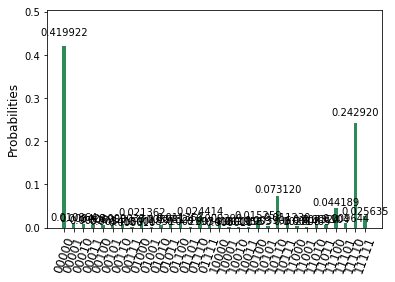

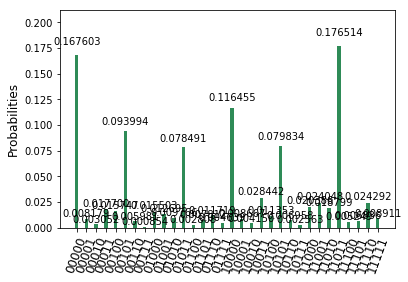

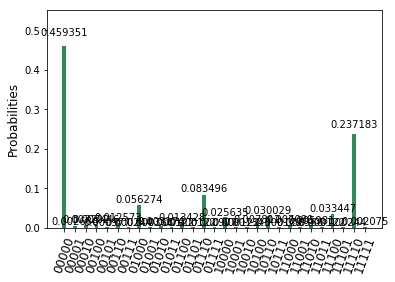

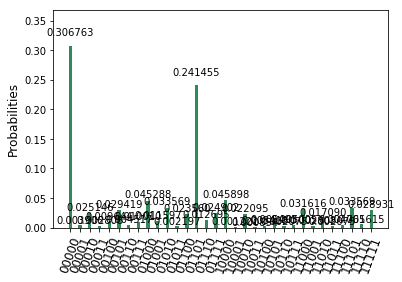

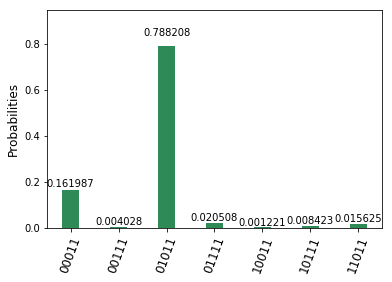

In [32]:
plot_histogram(result.get_counts("prep_FT"))
plot_histogram(result.get_counts("prep_FTv2"))
plot_histogram(result.get_counts("prep_NFT"))
plot_histogram(result.get_counts("prep_NFTold"))
plot_histogram(result.get_counts("prep_Bare - "+str(possible_pairs[cp])))

In [25]:
result.get_ran_qasm("prep_Bare")

In [23]:
def encoded_X1_circuit(mapping, qp):
    qrs = [qp.get_quantum_register(qrn) for qrn in qp.get_quantum_register_names()]
    crs = [qp.get_classical_register(crn) for crn in qp.get_classical_register_names()]
    qcircuit_encoded_X1 = qp.create_circuit("encoded_X1",qrs,crs)
    qcircuit_encoded_X1.x(qrs[0][mapping[0]])
    qcircuit_encoded_X1.x(qrs[0][mapping[1]])
    return qcircuit_encoded_X1
def encoded_X2_circuit(qr, mapping, qp):
    qcircuit_encoded_X2 = qp.create_circuit("encoded_X2",[qr],[])
    qcircuit_encoded_X2.x(qr[mapping[0]])
    qcircuit_encoded_X2.x(qr[mapping[2]])
    return qcircuit_encoded_X2
def encoded_Z1_circuit(qr, mapping, qp):
    qcircuit_encoded_Z1 = qp.create_circuit("encoded_Z1",[qr],[])
    qcircuit_encoded_Z1.z(qr[mapping[1]])
    qcircuit_encoded_Z1.z(qr[mapping[3]])
    return qcircuit_encoded_Z1
def encoded_Z2_circuit(qr, mapping, qp):
    qcircuit_encoded_Z2 = qp.create_circuit("encoded_Z2",[qr],[])
    qcircuit_encoded_Z2.z(qr[mapping[2]])
    qcircuit_encoded_Z2.z(qr[mapping[3]])
    return qcircuit_encoded_Z2
def encoded_CZ_circuit(qr, mapping, qp):
    qcircuit_encoded_CZ = qp.create_circuit("encoded_CZ",[qr],[])
    qcircuit_encoded_CZ.s(qr[mapping[0]])
    qcircuit_encoded_CZ.s(qr[mapping[1]])
    qcircuit_encoded_CZ.s(qr[mapping[2]])
    qcircuit_encoded_CZ.s(qr[mapping[3]])
    return qcircuit_encoded_CZ
def encoded_HHS_circuit(qr, mapping, qp):
    qcircuit_encoded_HHS = qp.create_circuit("encoded_HHS",[qr],[])
    qcircuit_encoded_HHS.h(qr[mapping[0]])
    qcircuit_encoded_HHS.h(qr[mapping[1]])
    qcircuit_encoded_HHS.h(qr[mapping[2]])
    qcircuit_encoded_HHS.h(qr[mapping[3]])
    return qcircuit_encoded_HHS

In [120]:
encoded_X1_circuit([0,1],qprogram).qasm()

'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[5];\ncreg c[5];\nx q[0];\nx q[1];\n'

In [28]:
#print(qprogram.compile(["prep_FT"],backend="ibmqx4")['circuits'][0]['compiled_circuit_qasm'])

In [30]:
import csv

with open('mycsvfile5.csv', 'w') as f:  # Just use 'w' mode in 3.x
    w = csv.DictWriter(f, result.get_counts("prep_FT").keys())
    w.writeheader()
    w.writerows([result.get_counts("prep_FT"),result.get_counts("prep_FTv2"),result.get_counts("prep_NFT"),result.get_counts("prep_NFTold"),result.get_counts("prep_Bare - "+str(possible_pairs[cp]))])

In [31]:
print(result.get_ran_qasm("prep_FT") + '\n')
print(result.get_ran_qasm("prep_FTv2") + '\n')
print(result.get_ran_qasm("prep_NFT") + '\n')
print(result.get_ran_qasm("prep_NFTold") + '\n')
print(result.get_ran_qasm("prep_Bare - "+str(possible_pairs[cp])) + '\n')

OPENQASM 2.0;
include "qelib1.inc";
qreg q[5];
creg c[5];
u2(0.0,3.141592653589793) q[3];
u2(0.0,3.141592653589793) q[2];
cx q[2],q[0];
cx q[2],q[1];
u2(0.0,3.141592653589793) q[2];
cx q[3],q[2];
u2(0.0,3.141592653589793) q[2];
cx q[2],q[4];
measure q[4] -> c[4];
u2(0.0,3.141592653589793) q[3];
measure q[3] -> c[3];
measure q[1] -> c[1];
cx q[2],q[0];
measure q[0] -> c[0];
measure q[2] -> c[2];


OPENQASM 2.0;
include "qelib1.inc";
qreg q[5];
creg c[5];
u2(0.0,3.141592653589793) q[3];
cx q[3],q[2];
u2(0.0,3.141592653589793) q[2];
u2(0.0,3.141592653589793) q[3];
cx q[3],q[4];
u2(0.0,3.141592653589793) q[4];
measure q[3] -> c[3];
cx q[2],q[1];
cx q[2],q[4];
u2(0.0,3.141592653589793) q[2];
u2(0.0,3.141592653589793) q[4];
cx q[2],q[4];
u2(0.0,3.141592653589793) q[2];
u2(0.0,3.141592653589793) q[4];
cx q[2],q[4];
u2(0.0,3.141592653589793) q[4];
measure q[4] -> c[4];
cx q[2],q[0];
cx q[1],q[0];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];


OPENQASM 2.0;
include "qelib1.

TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

In [19]:
def convert_rate(rT, rG):
    if rT['unit']=='ns':
        mT = 10**(-9)
    elif rT['unit']=='µs':
        mT = 10**(-6)
    else:
        mT = 1
    if rG['unit']=='ns':
        mG = 10**(-9)
    elif rG['unit']=='µs':
        mG = 10**(-6)
    else:
        mG = 1
    return 1-np.exp(-rG['value']*mG/(rT['value']*mT))
        

def rank_qubit_pairs(qp,backend):
    config = qp.get_backend_configuration(backend,list_format=True)
    calib = qp.get_backend_calibration(backend)
    param = qp.get_backend_parameters(backend)
    n = config['n_qubits']
    pairs_numbers = dict([(tuple(c),[]) for c in config['coupling_map']])
    for p,s in pairs_numbers.items():
        s.append(calib['qubits'][p[0]]['gateError']['value'])
        s.append(calib['qubits'][p[0]]['readoutError']['value'])
        s.append(calib['qubits'][p[1]]['gateError']['value'])
        s.append(calib['qubits'][p[1]]['readoutError']['value'])
        for r in calib['multi_qubit_gates']:
            if r['qubits']==list(p):
                s.append(r['gateError']['value'])
        s.append(convert_rate(param['qubits'][p[0]]['T1'],param['qubits'][p[0]]['gateTime']))
        s.append(convert_rate(param['qubits'][p[0]]['T2'],param['qubits'][p[0]]['gateTime']))
        s.append(convert_rate(param['qubits'][p[1]]['T1'],param['qubits'][p[1]]['gateTime']))
        s.append(convert_rate(param['qubits'][p[1]]['T2'],param['qubits'][p[1]]['gateTime']))
    for p,s in pairs_numbers.items():
        pairs_numbers[p] = sorted(s,reverse=True)
    return (sorted(pairs_numbers,key=pairs_numbers.__getitem__),pairs_numbers)

        
        
    
    
    
    


    

In [20]:
(sorted_pairs,pairs_dict) = rank_qubit_pairs(qprogram,"ibmqx4")

In [21]:
sorted_pairs

[(2, 0), (2, 1), (1, 0), (2, 4), (3, 2), (3, 4)]

In [42]:
bare_programs_list = []
bare_program_names_list = []
for p in sorted_pairs:
    bare_programs_list.append(prep_bare_circuit(p,qprogram,q,c))
    bare_program_names_list.append("prep_Bare - "+str(p))


In [43]:
bare_program_names_list

['prep_Bare - (2, 4)',
 'prep_Bare - (2, 1)',
 'prep_Bare - (2, 0)',
 'prep_Bare - (1, 0)',
 'prep_Bare - (3, 2)',
 'prep_Bare - (3, 4)']

In [44]:
result_bare = qprogram.execute(bare_program_names_list, "ibmqx4", shots=8192, max_credits=5, wait=10, timeout=2400)

In [75]:
with open('mycsvfile_bare2.csv', 'w') as f:  # Just use 'w' mode in 3.x
    w = csv.DictWriter(f, [('{0:0'+str(n)+'b}').format(j) for j in range(0,2**n)])
    w.writeheader()
    w.writerows([result_bare.get_counts(name) for name in bare_program_names_list])

In [74]:
[('{0:0'+str(n)+'b}').format(j) for j in range(0,2**n)]

['00000',
 '00001',
 '00010',
 '00011',
 '00100',
 '00101',
 '00110',
 '00111',
 '01000',
 '01001',
 '01010',
 '01011',
 '01100',
 '01101',
 '01110',
 '01111',
 '10000',
 '10001',
 '10010',
 '10011',
 '10100',
 '10101',
 '10110',
 '10111',
 '11000',
 '11001',
 '11010',
 '11011',
 '11100',
 '11101',
 '11110',
 '11111']

In [77]:
qprogram.get_circuit_names()

dict_keys(['prep_FT', 'prep_NFT', 'prep_NFTold', 'SWAP[2, 1]', 'prep_FTv2', 'SWAP[2, 4]', 'prep_Bare - [2, 4]', 'prep_Bare - (2, 4)', 'prep_Bare - (2, 1)', 'prep_Bare - (2, 0)', 'prep_Bare - (1, 0)', 'prep_Bare - (3, 2)', 'prep_Bare - (3, 4)'])

In [99]:
qcircuit = QuantumCircuit(q,c)

In [100]:
qcircuit.get_cregs()

{'c': <qiskit._classicalregister.ClassicalRegister at 0x7f51c43b0978>}

In [101]:
qcircuit.x(q[0])

In [102]:
qcircuit.qasm()

'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[5];\ncreg c[5];\nx q[0];\n'

In [103]:
qcircuit.extend(qc_FT)

In [112]:
list(qprogram.get_classical_register_names())[0]

'c'

In [27]:
testcircuit = qprogram.create_circuit("test_circuit",[q],[c])

In [28]:
testcircuit.measure(q[0],c[0])
testcircuit.reset(q[0])
testcircuit.x(q[0])
testcircuit.measure(q[0],c[1])

In [29]:
print(testcircuit.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[16];
creg c[16];
measure q[0] -> c[0];
reset q[0];
x q[0];
measure q[0] -> c[1];



In [25]:
testresult = qprogram.execute(["test_circuit"],"ibmqx5", shots=8192, max_credits=5, wait=10, timeout=2400)

TypeError: list indices must be integers or slices, not str

In [30]:
qprogram.get_circuit_names()

dict_keys(['test_circuit'])

In [27]:
lcircuit = [encoded_CZ_circuit,encoded_HHS_circuit,encoded_X1_circuit,encoded_X2_circuit,encoded_Z1_circuit,encoded_Z2_circuit]
dcircuit = {'ECZ' : encoded_CZ_circuit, 'EHHS' : encoded_HHS_circuit, 'EX1' : encoded_X1_circuit, 'EX2' : encoded_X2_circuit, 'EZ1' : encoded_Z1_circuit, 'EZ2' : encoded_Z2_circuit}

In [28]:
dcircuit['EX1']([1,2,3,4],qprogram).qasm()

'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[5];\ncreg c[5];\nx q[1];\nx q[2];\n'